In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns


# Define the directory where your CSV file is located
input_dir = '/kaggle/input/case-aqi/'

# Loop through the directory to find the CSV file
for dirname, _, filenames in os.walk(input_dir):
    for filename in filenames:
        if filename.endswith('.csv'):
            file_path = os.path.join(dirname, filename)
            print(f"Found file: {file_path}")

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df


Found file: /kaggle/input/case-aqi/case_data.csv


,Date,LOCATION,Air Quality Index (AQI),AQI CATEGORY,AQI RANGE
0,05-08-2020,DHAKAc,25,GOOD,NaN
1,05-08-2020,GAZIPURc,DNA,DNA,NaN
2,05-08-2020,NARAYANGANJc,22,GOOD,NaN
3,05-08-2020,CHITTAGONGc,DNA,DNA,NaN
4,05-08-2020,SYLHETc,40,GOOD,NaN
...,...,...,...,...,...
26246,06-06-2022,SavarC,54,MODERATE,NaN
26247,06-06-2022,MymensinghC,119,CAUTION,NaN
26248,06-06-2022,Rangpurc,30,GOOD,NaN
26249,06-06-2022,Cumillac,74,MODERATE,NaN


## **Lets have a look at the dataset**

In [2]:
#checking the first 5 records
df.head()

,Date,LOCATION,Air Quality Index (AQI),AQI CATEGORY,AQI RANGE
0,05-08-2020,DHAKAc,25,GOOD,NaN
1,05-08-2020,GAZIPURc,DNA,DNA,NaN
2,05-08-2020,NARAYANGANJc,22,GOOD,NaN
3,05-08-2020,CHITTAGONGc,DNA,DNA,NaN
4,05-08-2020,SYLHETc,40,GOOD,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26251 entries, 0 to 26250
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     26238 non-null  object
 1   LOCATION                 26202 non-null  object
 2   Air Quality Index (AQI)  25610 non-null  object
 3   AQI CATEGORY             26188 non-null  object
 4   AQI RANGE                4216 non-null   object
dtypes: object(5)
memory usage: 1.0+ MB


In [4]:
#checking the shape
df.shape

(26251, 5)

In [5]:
#checking the index
df.index

RangeIndex(start=0, stop=26251, step=1)

In [6]:
#checking the column names
df.columns

Index(['Date', 'LOCATION', 'Air Quality Index (AQI)', 'AQI CATEGORY',
       'AQI RANGE'],
      dtype='object')

In [7]:
#checking the data-type of each columns
df.dtypes

Date                       object
LOCATION                   object
Air Quality Index (AQI)    object
AQI CATEGORY               object
AQI RANGE                  object
dtype: object

In [8]:
#shows all the unique values of 'Location'
df['LOCATION'].unique()

array(['DHAKAc', 'GAZIPURc', 'NARAYANGANJc', 'CHITTAGONGc', 'SYLHETc',
       'KHULNAc', 'RAJSHAHIc', 'BARISHALc', 'SAVARc', 'MYMENSINGHc',
       'RANGPURc', 'CUMILLAc', 'NARSINGDIc', 'Dhakaa', 'Chittagongb',
       'Gazipurc', 'Narayanganjc', 'Sylhetcc', 'Khulnac', 'Rajshahic',
       'Barisalc', 'Sylhetc', 'gongb', 'Dhakac', 'Chittagongc', 'Dhakab',
       'DhakaC', 'ChittagongC', 'Sylhetc2', 'DHAKAb', nan, 'NARSINGDI',
       '114AZIPURc', 'CHITTAGONGb', 'SavarC', 'MymensinghC', 'Rangpurc',
       'Cumillac', 'Narsingdic'], dtype=object)

In [9]:
#shows the number of unique values of 'Location'
df['LOCATION'].nunique()

38

In [10]:
#checking the unique values 
df.nunique()

Date                       2738
LOCATION                     38
Air Quality Index (AQI)     527
AQI CATEGORY                 34
AQI RANGE                  2148
dtype: int64

In [11]:
df.count()

Date                       26238
LOCATION                   26202
Air Quality Index (AQI)    25610
AQI CATEGORY               26188
AQI RANGE                   4216
dtype: int64

In [12]:
#checking the AQI Category values, missing values, misspellings present
df['AQI CATEGORY'].value_counts()

AQI CATEGORY
DNA                         5334
MODERATE                    4723
GOOD                        3757
UNHEALTHY                   3547
CAUTION                     3361
VERY UNHEALTHY              2829
EXTREMELY UNHEALTHY         2431
VERY UNHEALTHY                84
EXTREMELY UNHEALTHY           42
DATA NOT AVAILABLE            20
EXETREMELY UNHEALTHY          18
Moderate                       6
VERY UHEALTHY                  5
EXTREMLY UNHEALTHY             4
EXTREMELYÂÂ UNHEALTHY          3
MODERATRE                      2
GOOd                           2
Good                           2
VEARY UNHEALTHY                2
MODETATE                       2
VERU UNHEALTHY                 1
CUTION                         1
VERY UNHEALTHTY                1
EXTREMELY UNHELTHY             1
VERYÂ UNHEALTHY                1
EXETREMELY UNHEALTHY           1
MODEARTE                       1
EXTREMELYÂÂ UNHEALTHY          1
EXTREMELYÂ UNHEALTHY           1
ÂÂ UNHEALTHY                  

In [13]:
df.isnull().sum()

Date                          13
LOCATION                      49
Air Quality Index (AQI)      641
AQI CATEGORY                  63
AQI RANGE                  22035
dtype: int64

## **Data Cleaning**

#### *As there are many instances of NaN values and misspellings in the dataset. The timeseries is also not sorted. Lets fix these*

In [14]:
# The AQI RANGE Col is reduntant and contains no values, lets drop the entire column
df = df.drop(['AQI RANGE'], axis = 1)
df

,Date,LOCATION,Air Quality Index (AQI),AQI CATEGORY
0,05-08-2020,DHAKAc,25,GOOD
1,05-08-2020,GAZIPURc,DNA,DNA
2,05-08-2020,NARAYANGANJc,22,GOOD
3,05-08-2020,CHITTAGONGc,DNA,DNA
4,05-08-2020,SYLHETc,40,GOOD
...,...,...,...,...
26246,06-06-2022,SavarC,54,MODERATE
26247,06-06-2022,MymensinghC,119,CAUTION
26248,06-06-2022,Rangpurc,30,GOOD
26249,06-06-2022,Cumillac,74,MODERATE


In [15]:
#checking NaN values
df.isnull().sum()

Date                        13
LOCATION                    49
Air Quality Index (AQI)    641
AQI CATEGORY                63
dtype: int64

In [16]:
# dropping the NaN values and checking
df = df.dropna()

df.isnull().sum()


Date                       0
LOCATION                   0
Air Quality Index (AQI)    0
AQI CATEGORY               0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25605 entries, 0 to 26250
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     25605 non-null  object
 1   LOCATION                 25605 non-null  object
 2   Air Quality Index (AQI)  25605 non-null  object
 3   AQI CATEGORY             25605 non-null  object
dtypes: object(4)
memory usage: 1000.2+ KB


In [18]:
df.LOCATION.nunique()


38

In [19]:
# lets fix the location column values
# Comprehensive mapping dictionary
location_mapping = {
    'DHAKAc': 'Dhaka',
    'GAZIPURc': 'Gazipur',
    'NARAYANGANJc': 'Narayanganj',
    'CHITTAGONGc': 'Chittagong',
    'SYLHETc': 'Sylhet',
    'KHULNAc': 'Khulna',
    'RAJSHAHIc': 'Rajshahi',
    'BARISHALc': 'Barishal',
    'SAVARc': 'Savar',
    'MYMENSINGHc': 'Mymensingh',
    'RANGPURc': 'Rangpur',
    'CUMILLAc': 'Cumilla',
    'NARSINGDIc': 'Narsingdi',
    'Dhakaa': 'Dhaka',
    'Chittagongb': 'Chittagong',
    'Gazipurc': 'Gazipur',
    'Narayanganjc': 'Narayanganj',
    'Sylhetcc': 'Sylhet',
    'Khulnac': 'Khulna',
    'Rajshahic': 'Rajshahi',
    'Barisalc': 'Barishal',
    'Sylhetc': 'Sylhet',
    'gongb': 'Chittagong',  # Assuming this is a typo for 'Chittagong'
    'Dhakac': 'Dhaka',
    'Chittagongc': 'Chittagong',
    'Dhakab': 'Dhaka',
    'DhakaC': 'Dhaka',
    'ChittagongC': 'Chittagong',
    'Sylhetc2': 'Sylhet',  # Assuming this is a typo for 'Sylhet'
    'DHAKAb': 'Dhaka',
    'NARSINGDI': 'Narsingdi',
    '114AZIPURc': 'Gazipur',  # Assuming this is a typo for 'Gazipur'
    'CHITTAGONGb': 'Chittagong',
    'SavarC': 'Savar',
    'MymensinghC': 'Mymensingh',
    'Rangpurc': 'Rangpur',
    'Cumillac': 'Cumilla',
    'Narsingdic': 'Narsingdi'
}

# Replace the LOCATION column values based on the mapping dictionary
df['LOCATION'] = df['LOCATION'].replace(location_mapping)

# Display the DataFrame after renaming the locations
print(df)


             Date     LOCATION Air Quality Index (AQI) AQI CATEGORY
0      05-08-2020        Dhaka                      25         GOOD
1      05-08-2020      Gazipur                     DNA          DNA
2      05-08-2020  Narayanganj                      22         GOOD
3      05-08-2020   Chittagong                     DNA          DNA
4      05-08-2020       Sylhet                      40         GOOD
...           ...          ...                     ...          ...
26246  06-06-2022        Savar                      54     MODERATE
26247  06-06-2022   Mymensingh                     119      CAUTION
26248  06-06-2022      Rangpur                      30         GOOD
26249  06-06-2022      Cumilla                      74     MODERATE
26250  06-06-2022    Narsingdi                      64     MODERATE

[25605 rows x 4 columns]


/tmp/ipykernel_33/1894805047.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LOCATION'] = df['LOCATION'].replace(location_mapping)


In [20]:
df.LOCATION.nunique()

13

Now the location formatting is fixed. there is still some NaN values as DNA. lets remove these

In [21]:
df[df['Air Quality Index (AQI)'] =='DNA' ]

,Date,LOCATION,Air Quality Index (AQI),AQI CATEGORY
1,05-08-2020,Gazipur,DNA,DNA
3,05-08-2020,Chittagong,DNA,DNA
5,05-08-2020,Khulna,DNA,DNA
7,05-08-2020,Barishal,DNA,DNA
8,05-08-2020,Savar,DNA,DNA
...,...,...,...,...
26190,28-05-2022,Sylhet,DNA,DNA
26203,05-06-2022,Sylhet,DNA,DNA
26216,08-06-2022,Sylhet,DNA,DNA
26229,07-06-2022,Sylhet,DNA,DNA


In [22]:
df = df.drop('AQI CATEGORY', axis = 1)
df

,Date,LOCATION,Air Quality Index (AQI)
0,05-08-2020,Dhaka,25
1,05-08-2020,Gazipur,DNA
2,05-08-2020,Narayanganj,22
3,05-08-2020,Chittagong,DNA
4,05-08-2020,Sylhet,40
...,...,...,...
26246,06-06-2022,Savar,54
26247,06-06-2022,Mymensingh,119
26248,06-06-2022,Rangpur,30
26249,06-06-2022,Cumilla,74


In [23]:
df[df['Air Quality Index (AQI)'] =='DNA' ]

,Date,LOCATION,Air Quality Index (AQI)
1,05-08-2020,Gazipur,DNA
3,05-08-2020,Chittagong,DNA
5,05-08-2020,Khulna,DNA
7,05-08-2020,Barishal,DNA
8,05-08-2020,Savar,DNA
...,...,...,...
26190,28-05-2022,Sylhet,DNA
26203,05-06-2022,Sylhet,DNA
26216,08-06-2022,Sylhet,DNA
26229,07-06-2022,Sylhet,DNA


In [24]:
# Dropping rows where 'Air Quality Index (AQI)' is 'DNA'
df.drop(df[df['Air Quality Index (AQI)'] == 'DNA'].index, inplace=True)
df

,Date,LOCATION,Air Quality Index (AQI)
0,05-08-2020,Dhaka,25
2,05-08-2020,Narayanganj,22
4,05-08-2020,Sylhet,40
6,05-08-2020,Rajshahi,25
10,05-08-2020,Rangpur,72
...,...,...,...
26246,06-06-2022,Savar,54
26247,06-06-2022,Mymensingh,119
26248,06-06-2022,Rangpur,30
26249,06-06-2022,Cumilla,74


In [25]:
df.rename(columns={'LOCATION': 'City', 'Air Quality Index (AQI)': 'AQI'}, inplace=True)
df

,Date,City,AQI
0,05-08-2020,Dhaka,25
2,05-08-2020,Narayanganj,22
4,05-08-2020,Sylhet,40
6,05-08-2020,Rajshahi,25
10,05-08-2020,Rangpur,72
...,...,...,...
26246,06-06-2022,Savar,54
26247,06-06-2022,Mymensingh,119
26248,06-06-2022,Rangpur,30
26249,06-06-2022,Cumilla,74


In [26]:
# Convert 'Date' column to datetime with specified format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Display DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20963 entries, 0 to 26250
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20963 non-null  datetime64[ns]
 1   City    20963 non-null  object        
 2   AQI     20963 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 655.1+ KB


In [27]:
# Sort the DataFrame by 'Date' column
df = df.sort_values(by='Date')

# Print the sorted DataFrame
print(df)

            Date         City  AQI
182   2014-02-17        Dhaka  172
183   2014-02-17   Chittagong  125
184   2014-02-17      Gazipur  178
185   2014-02-17  Narayanganj  174
186   2014-02-17       Sylhet  129
...          ...          ...  ...
26221 2022-06-08   Mymensingh  106
26222 2022-06-08      Rangpur  119
26223 2022-06-08      Cumilla   98
26218 2022-06-08     Rajshahi  141
26224 2022-06-08    Narsingdi   79

[20963 rows x 3 columns]


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20963 entries, 182 to 26224
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20963 non-null  datetime64[ns]
 1   City    20963 non-null  object        
 2   AQI     20963 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 655.1+ KB


In [29]:
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20963 entries, 182 to 26224
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20963 non-null  datetime64[ns]
 1   City    20963 non-null  object        
 2   AQI     20948 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 655.1+ KB


In [30]:
df.isnull().sum()

Date     0
City     0
AQI     15
dtype: int64

In [31]:
df=df.dropna()
df.isnull().sum()

Date    0
City    0
AQI     0
dtype: int64

In [32]:
df['City'].value_counts()

City
Dhaka          2734
Chittagong     2471
Gazipur        2466
Narayanganj    2454
Barishal       2275
Sylhet         2240
Rajshahi       2222
Khulna         1342
Cumilla         668
Rangpur         637
Mymensingh      624
Narsingdi       537
Savar           278
Name: count, dtype: int64

In [33]:
#there are 0s in the AQI column, lets get rid of them as well
df[df.AQI==0]

,Date,City,AQI
2558,2015-01-01,Rajshahi,0.0
2557,2015-01-01,Khulna,0.0
2533,2015-01-02,Khulna,0.0
2534,2015-01-02,Rajshahi,0.0
2549,2015-01-03,Khulna,0.0
...,...,...,...
3102,2015-03-14,Rajshahi,0.0
3157,2015-03-15,Khulna,0.0
3158,2015-03-15,Rajshahi,0.0
4826,2015-10-13,Gazipur,0.0


In [34]:
df = df[df['AQI'] != 0]
df

,Date,City,AQI
182,2014-02-17,Dhaka,172.0
183,2014-02-17,Chittagong,125.0
184,2014-02-17,Gazipur,178.0
185,2014-02-17,Narayanganj,174.0
186,2014-02-17,Sylhet,129.0
...,...,...,...
26221,2022-06-08,Mymensingh,106.0
26222,2022-06-08,Rangpur,119.0
26223,2022-06-08,Cumilla,98.0
26218,2022-06-08,Rajshahi,141.0


In [35]:
df[df.AQI==0]

,Date,City,AQI


Done!!!

### **How many unique cities are in the dataset? what are they?**


In [36]:
df.City.nunique()

13

In [37]:
df.City.unique()

array(['Dhaka', 'Chittagong', 'Gazipur', 'Narayanganj', 'Sylhet',
       'Rajshahi', 'Barishal', 'Khulna', 'Narsingdi', 'Cumilla',
       'Rangpur', 'Savar', 'Mymensingh'], dtype=object)

### **What is the Average AQI of the dataset?**

In [38]:
df.AQI.mean()

149.09212674027845

In [39]:
df.AQI.describe()

count    20830.000000
mean       149.092127
std        103.141893
min          3.000000
25%         64.000000
50%        126.000000
75%        207.000000
max        821.000000
Name: AQI, dtype: float64

### **The max AQI is 821, find the date and the location of that record**

In [40]:
df.loc[df['AQI'].idxmax()]

Date    2017-01-08 00:00:00
City            Narayanganj
AQI                   821.0
Name: 8459, dtype: object

In [41]:
df.loc[df['AQI'].idxmin()]

Date    2014-12-28 00:00:00
City                 Khulna
AQI                     3.0
Name: 2493, dtype: object

In [42]:
df.AQI.std()

103.14189301172081

In [43]:
df.AQI.var()

10638.250094041261

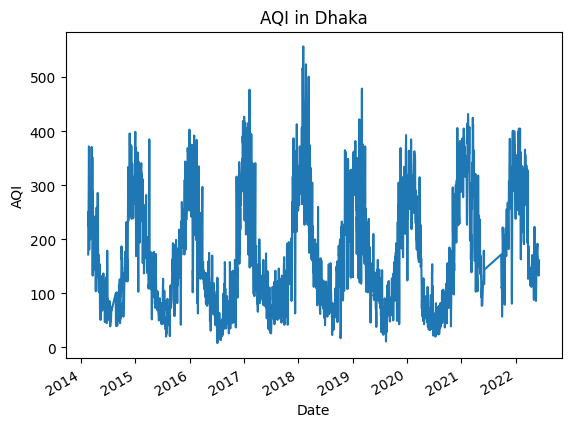

In [44]:
df[df['City'] == 'Dhaka'].plot(x='Date', y='AQI', title='AQI in Dhaka', legend=False)
plt.ylabel('AQI')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

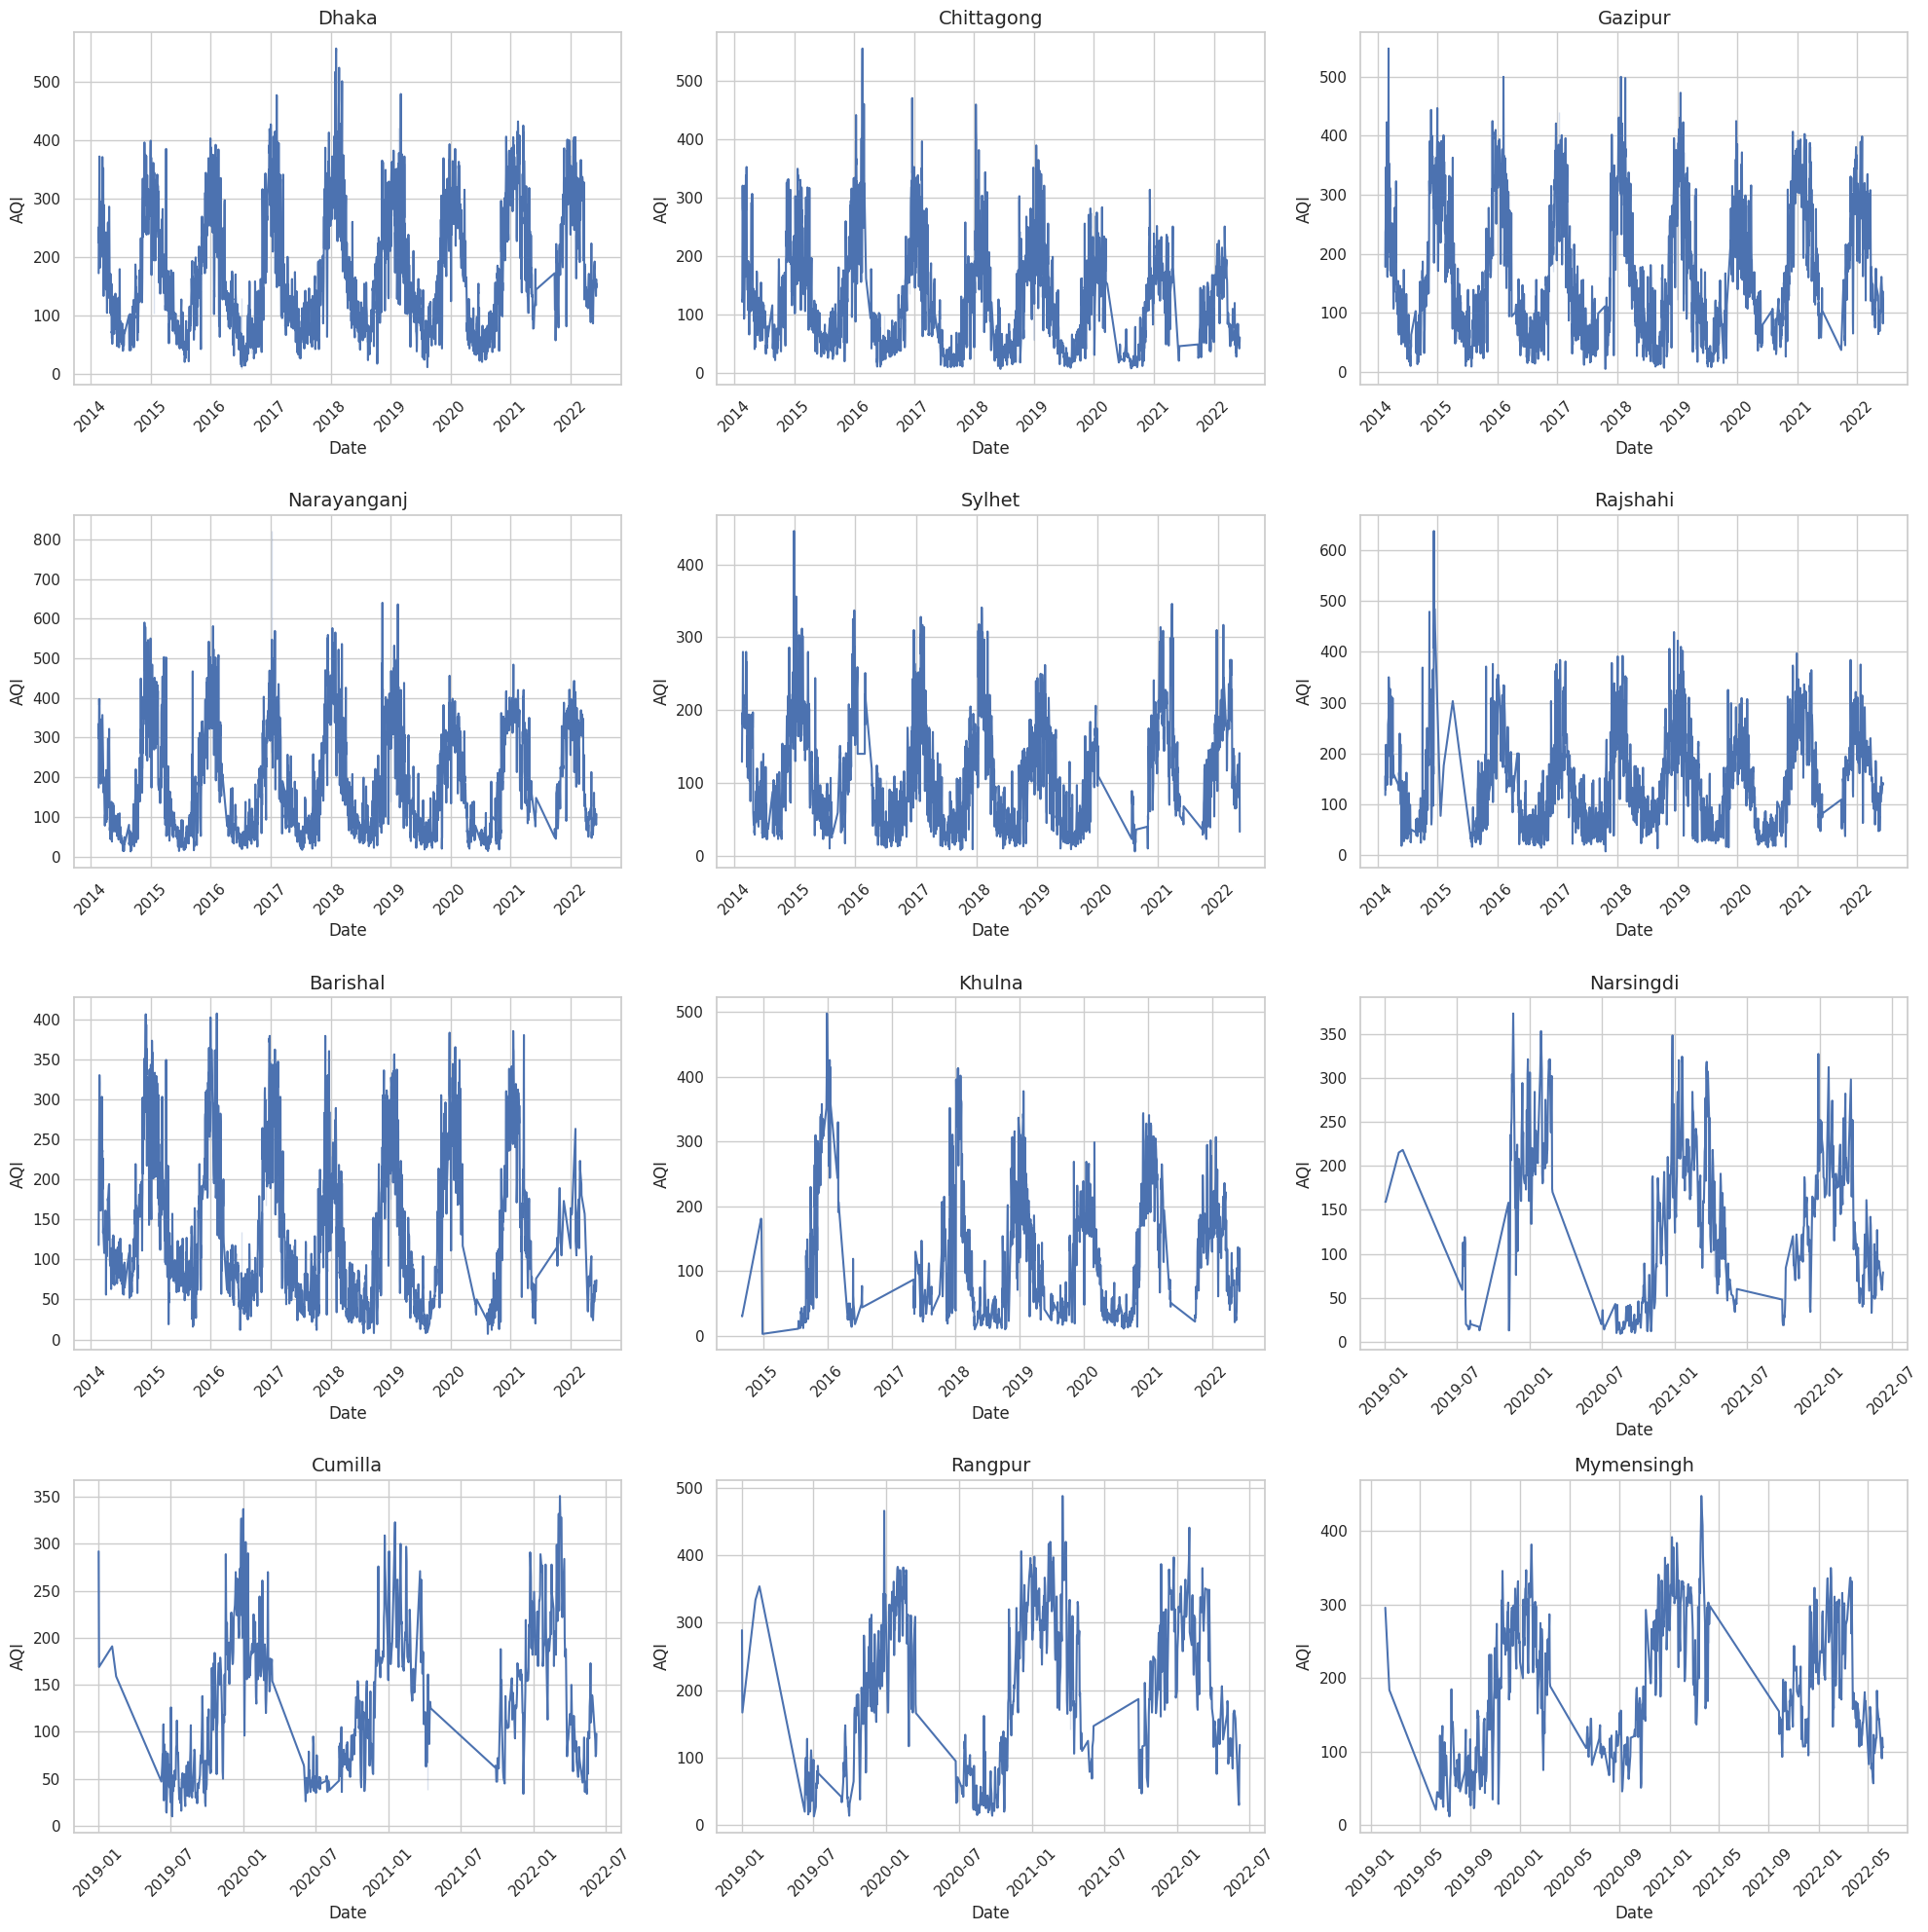

In [56]:
#subplot showing all the city's AQI
cities = [city for city in df['City'].unique() if city != 'Savar']
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()
for i, city in enumerate(cities):
    city_data = df[df['City'] == city]
    sns.lineplot(x='Date', y='AQI', data=city_data, ax=axes[i])
    axes[i].set_title(city, fontsize=14)
    axes[i].set_ylabel('AQI', fontsize=12)
    axes[i].set_xlabel('Date', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('cities_aqi_plot.png')  # Save the plot as a PNG file
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


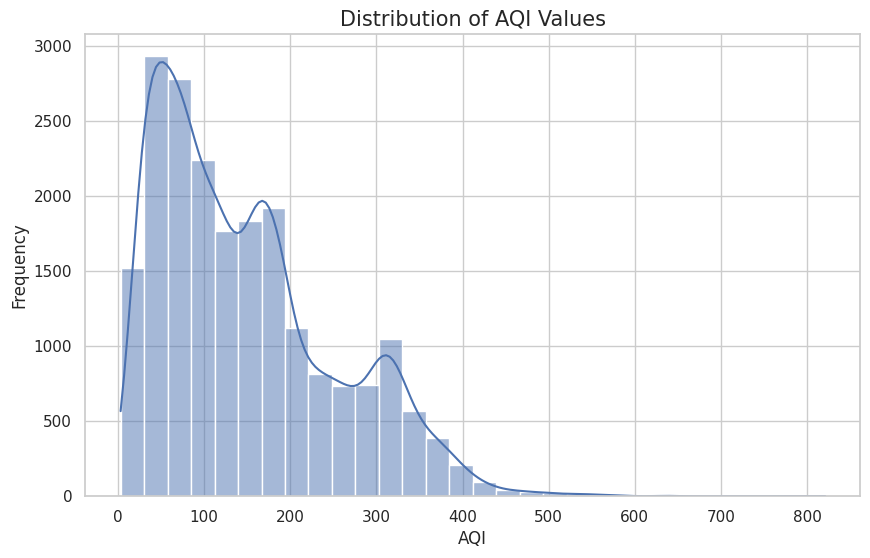

In [46]:
#data distribution of AQI values
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'], bins=30, kde=True)
plt.title('Distribution of AQI Values', fontsize=15)
plt.xlabel('AQI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [47]:
#finding which city has the most and least records
df.City.value_counts()


City
Dhaka          2734
Chittagong     2470
Gazipur        2464
Narayanganj    2448
Barishal       2274
Sylhet         2224
Rajshahi       2176
Khulna         1296
Cumilla         668
Rangpur         637
Mymensingh      624
Narsingdi       537
Savar           278
Name: count, dtype: int64

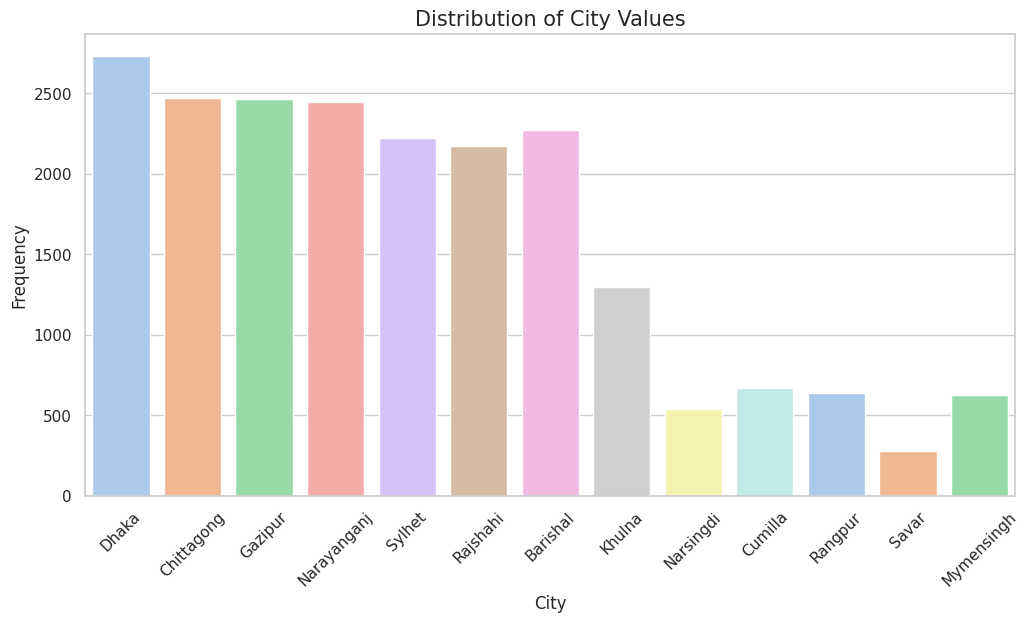

In [48]:
#data distribution of each cities
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x='City', data=df, palette='pastel')
plt.title('Distribution of City Values', fontsize=15)
plt.xlabel('City', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

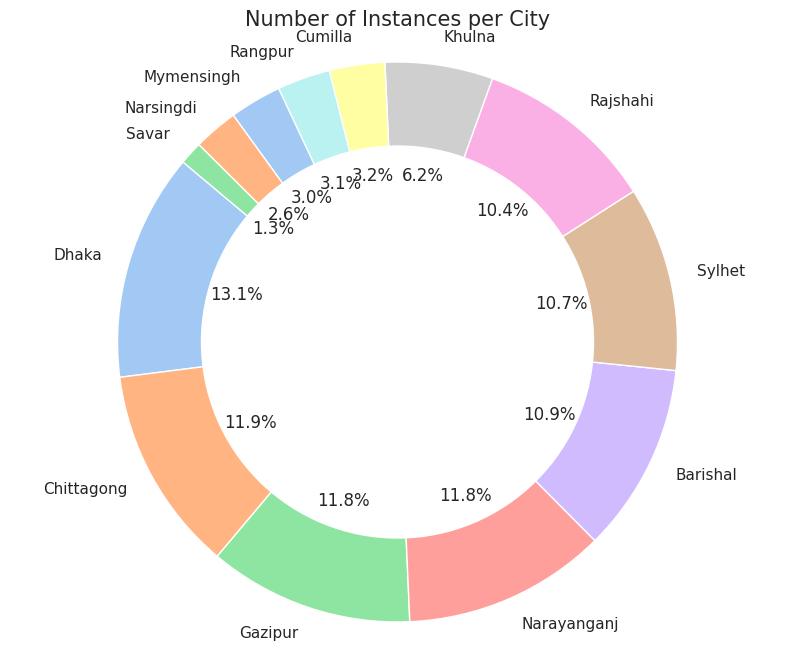

In [49]:
#showing the number of instances per city
sns.set(style="whitegrid")
city_counts = df['City'].value_counts()
colors = sns.color_palette('pastel')[0:len(city_counts)]
plt.figure(figsize=(10, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Number of Instances per City', fontsize=15)
plt.axis('equal') 
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


In [50]:
#finding is the percentile of unhealthy AQI values
len(df[df['AQI'] > 150]) / len(df) *100

43.02928468554969

In [51]:
#finding the instances of Dhakas AQI more than 150
df[(df.City == 'Dhaka') & (df.AQI > 150)]

,Date,City,AQI
182,2014-02-17,Dhaka,172.0
206,2014-02-18,Dhaka,251.0
198,2014-02-19,Dhaka,224.0
190,2014-02-20,Dhaka,287.0
214,2014-02-21,Dhaka,349.0
...,...,...,...
24093,2022-05-25,Dhaka,182.0
26186,2022-05-28,Dhaka,192.0
26173,2022-05-29,Dhaka,173.0
26238,2022-06-06,Dhaka,155.0
